In [3]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Reading datafile

customers=pd.read_csv('Ecommerce Customers')

In [9]:
#Basic understanding of the dataset

customers.head()
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


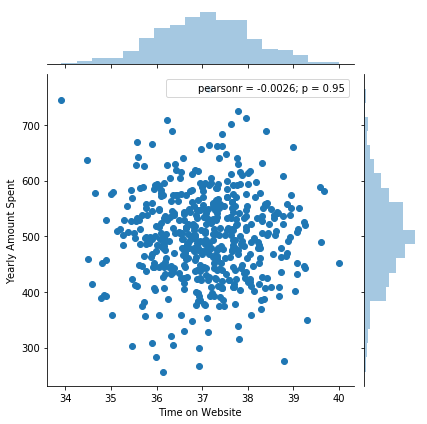

In [10]:
#Exploratory Data Analysis

#Time on Website vs Yearly Amount Spent

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

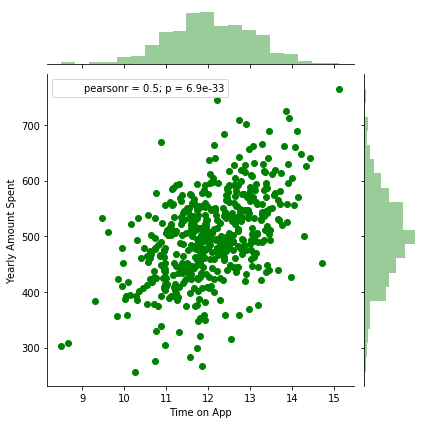

In [13]:
#Time on App vs Yearly Spent

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, color='green')

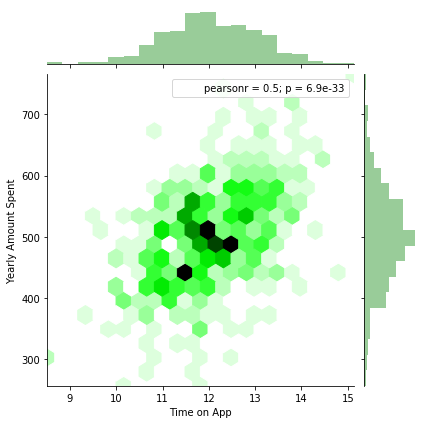

In [14]:
# Hex plot to visualize the data points better
# Time on app vs Yearly Spent

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, color='green', kind='hex')

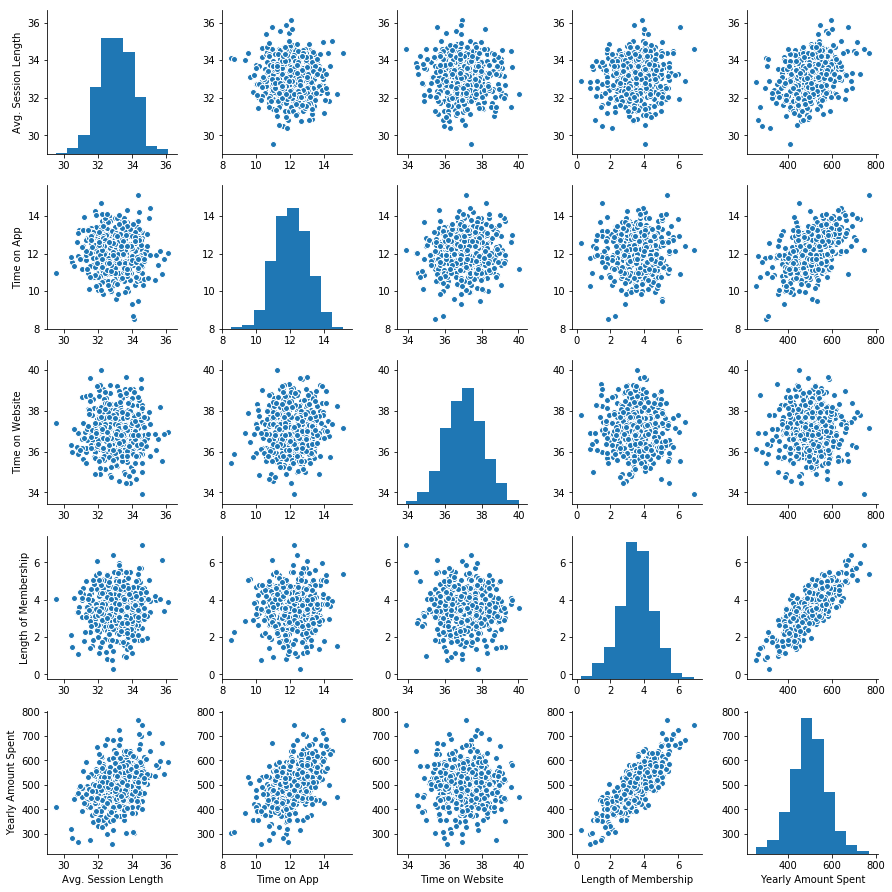

In [15]:
#Explore the relationships across entire data set using paiplot

sns.pairplot(customers)

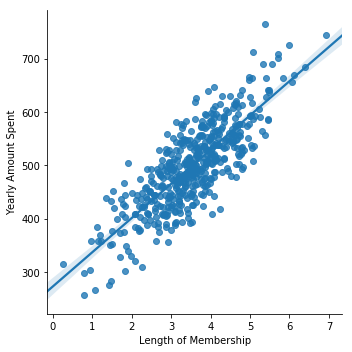

In [16]:
#From the pairplot, it is quite evident that "Length of Membership" has correlated most with th e"yearly Amount spent" exhibiting a linear relationship

# lmplot between Length of Membership and Yearly Spent

sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [7]:
#Splitting data

y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
#Training the model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#Predicting on test data

predictions = lm.predict( X_test)

array([ 456.44186104,  402.72005312,  409.2531539 ,  591.4310343 ,
        590.01437275,  548.82396607,  577.59737969,  715.44428115,
        473.7893446 ,  545.9211364 ,  337.8580314 ,  500.38506697,
        552.93478041,  409.6038964 ,  765.52590754,  545.83973731,
        693.25969124,  507.32416226,  573.10533175,  573.2076631 ,
        397.44989709,  555.0985107 ,  458.19868141,  482.66899911,
        559.2655959 ,  413.00946082,  532.25727408,  377.65464817,
        535.0209653 ,  447.80070905,  595.54339577,  667.14347072,
        511.96042791,  573.30433971,  505.02260887,  565.30254655,
        460.38785393,  449.74727868,  422.87193429,  456.55615271,
        598.10493696,  449.64517443,  615.34948995,  511.88078685,
        504.37568058,  515.95249276,  568.64597718,  551.61444684,
        356.5552241 ,  464.9759817 ,  481.66007708,  534.2220025 ,
        256.28674001,  505.30810714,  520.01844434,  315.0298707 ,
        501.98080155,  387.03842642,  472.97419543,  432.87046

Text(0,0.5,'Predicted Y')

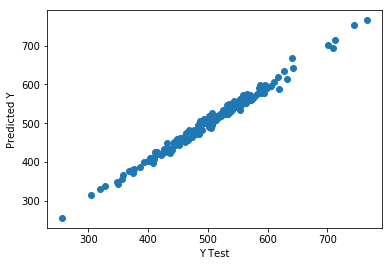

In [11]:
# Test vs Predicted

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [13]:
#calculating the metrics

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


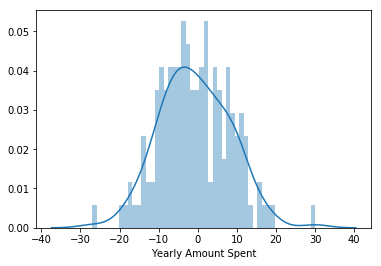

In [15]:
#residuals

sns.distplot((y_test-predictions),bins=50);

In [16]:
#co-efficients

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
